Read DF's

In [31]:
import numpy as np
import pandas as pd

us_trending_df = pd.read_csv("./data/stage_1_us_trending.csv")
color_text_df = pd.read_csv("./data/stage_2_thumbnail_colors_and_text.csv")
face_df = pd.read_csv("./data/stage_2_thumbnail_face.csv")
objects_df = pd.read_csv("./data/stage_2_thumbnail_objects_vectors.csv").drop('Unnamed: 0', axis=1)

Merge DF's

In [32]:
df = pd.concat([us_trending_df, color_text_df, face_df, objects_df], axis=1)
df.head()

,channelId,channelTitle,trending_date,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,thumbnail_face_dominant_race,thumbnail_face_gender,person,potted plant,chair,sports ball,tie,tv,frisbee,cell phone
0,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,...,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,...,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,...,4.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,...,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Calculate correlations between attributes and target class

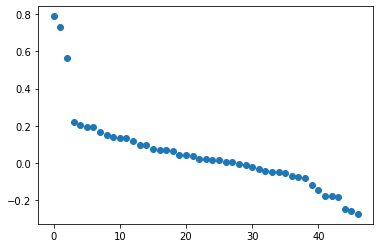

In [33]:
from matplotlib import pyplot as plt

target_class = 'likes'

corr_dct = dict(df.corr(method = 'spearman')[target_class].drop(target_class).dropna())
corr_dct = dict(sorted(corr_dct.items(), key=lambda item: item[1], reverse=True))

plt.scatter(range(len(corr_dct)), corr_dct.values())

Find attributes with small correlation

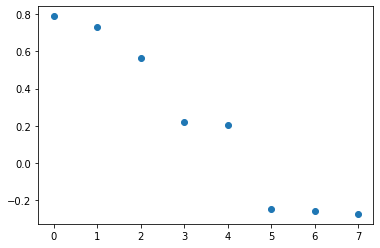

In [34]:
for k in list(corr_dct.keys()):
    if abs(corr_dct[k]) < 0.2:
        corr_dct.pop(k)

plt.scatter(range(len(corr_dct)), corr_dct.values())

Drop attributes with small correlation from data and save to csv

In [35]:
columns_to_drop = [ele for ele in list(df.columns) if ele not in list(corr_dct.keys())]
df.drop(columns = columns_to_drop, axis=1, inplace=True)
df.to_csv("./data/stage_3_feature_importance.csv")
df.head()

,view_count,dislikes,comment_count,title_length,thumbnail_med_value,thumbnail_avg_value,thumbnail_face_race_latino_hispanic,chair
0,1514614,5855,35313,34,221.0,210.375910,10.070622,0.0
1,2381688,2794,16549,60,77.0,108.250185,0.000000,0.0
2,2038853,2628,40221,53,131.0,136.325486,17.334764,0.0
3,496771,1856,7647,56,152.0,149.524666,21.723383,1.0
4,1123889,964,2196,55,178.0,166.311347,23.499392,0.0
